# **NB02 - Data Analysis**

**OBJECTIVE:**
Transform the raw JSON outputs from NB01 into structured DataFrames, compute summary statistics, and produce clear visual insights that shed light on London’s rainfall characteristics relative to other major cities.  

Visualisations included:
- Bar chart visualising the number of days of rain in 2003 and 2023 
- Bar chart visualising the total precipitation in mm in 2003 and 2023
- Map visualising the total precipitation in each city in 2023
- Boxplots visualising the daily precipitation in mm for each city in 2003 and 2023

**AUTHOR:** 
@nadiabegic on GitHub

**LAST EDITED:**
3-Dec-2025

--------------------

**Imports:**

In [29]:
import pandas as pd
import geopandas as gpd
import json
from shapely import *
import shapefile
from shapely.geometry import shape
from lets_plot import *
LetsPlot.setup_html()
from IPython.display import Image

# 1. Visualise the number of days of rainfall in 2003 vs. 2023

1.1 Load the JSON file _days_rain_2023.json_ as a pandas dataframe

In [6]:
with open('../data/days_rain_2023.json', 'r') as file:
    days_2023_data = json.load(file)

df_days_rain_2023 = pd.DataFrame(list(days_2023_data.items()), columns=['City', 'Days of Rain in 2023'])
df_days_rain_2023

,City,Days of Rain in 2023
0,London,228
1,Edinburgh,270
2,Sarajevo,200
3,Amsterdam,266
4,Paris,225
5,Madrid,123
6,Damascus,64
7,New York City,187
8,Los Angeles,103
9,Dubai,28


1.2 Load the JSON file _days_rain_2003.json_ as a pandas dataframe

In [7]:
with open('../data/days_rain_2003.json', 'r') as file:
    days_2003_data = json.load(file)

df_days_rain_2003 = pd.DataFrame(list(days_2003_data.items()), columns=['City', 'Days of Rain in 2003'])
df_days_rain_2003
    

,City,Days of Rain in 2003
0,London,159
1,Edinburgh,191
2,Sarajevo,169
3,Amsterdam,163
4,Paris,158
5,Madrid,120
6,Damascus,75
7,New York City,162
8,Los Angeles,49
9,Dubai,16


1.3 Merge the two dataframes in order to plot them on a singular bar chart

In [8]:
df_days_rain = df_days_rain_2023.merge(df_days_rain_2003)
df_days_rain

,City,Days of Rain in 2023,Days of Rain in 2003
0,London,228,159
1,Edinburgh,270,191
2,Sarajevo,200,169
3,Amsterdam,266,163
4,Paris,225,158
5,Madrid,123,120
6,Damascus,64,75
7,New York City,187,162
8,Los Angeles,103,49
9,Dubai,28,16


1.4 Visualise the discrete data as a bar chart using lets-plot

In [38]:
df_days_melted = df_days_rain.melt(id_vars=['City'], 
                              value_vars=['Days of Rain in 2003', 'Days of Rain in 2023'], 
                              var_name='Year', 
                              value_name='Days of Rain')

days_rain_plot = (
     ggplot(df_days_melted, aes(x='City', y='Days of Rain', fill='Year')) +
     geom_bar(stat='identity', position='dodge') + 
     scale_fill_manual(values={'Days of Rain in 2003': '#505fd6', 'Days of Rain in 2023': '#08189b'}) +
     scale_y_continuous() +
     labs(x="City",
          y="Days of Rain",
          title="Edinburgh had the most days of rain, London ranks 3rd",
          subtitle="Collected with OpenMeteo API")
)

In [35]:
ggsave(days_rain_plot, filename='days_rain_plot.png', path='../figures')

'/Users/nadiabegic/Desktop/personal/projects/global-weather-analysis/figures/days_rain_plot.png'

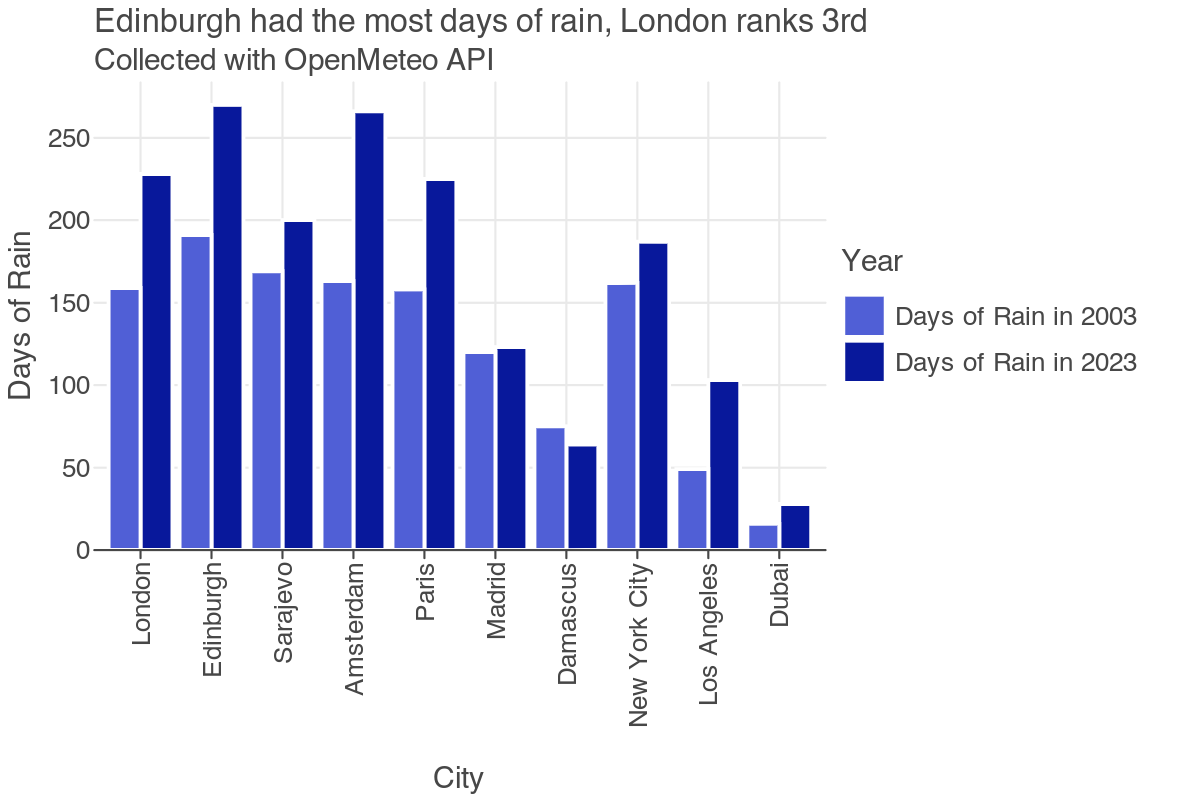

In [37]:
Image(filename='../figures/days_rain_plot.png')

# 2. Visualise the total precipitation in 2003 vs. 2023

2.1 Load the JSON file _total_precipitation_2023.json_ as a pandas dataframe

In [10]:
with open('../data/total_precipitation_2023.json', 'r') as file:
    total_prec_2023_data = json.load(file)

df_total_prec_2023 = pd.DataFrame(list(total_prec_2023_data.items()), columns=['City', 'Total Precipitation in 2023 (mm)'])
df_total_prec_2023

,City,Total Precipitation in 2023 (mm)
0,London,769.5
1,Edinburgh,1109.2
2,Sarajevo,1262.3
3,Amsterdam,1199.2
4,Paris,963.8
5,Madrid,516.4
6,Damascus,182.0
7,New York City,1492.5
8,Los Angeles,979.7
9,Dubai,79.6


2.2 Load the JSON file _total_precipitation_2003.json_ as a pandas dataframe

In [11]:
with open('../data/total_precipitation_2003.json', 'r') as file:
    total_prec_2003_data = json.load(file)

df_total_prec_2003 = pd.DataFrame(list(total_prec_2003_data.items()), columns=['City', 'Total Precipitation in 2003 (mm)'])
df_total_prec_2003

,City,Total Precipitation in 2003 (mm)
0,London,546.6
1,Edinburgh,515.4
2,Sarajevo,787.9
3,Amsterdam,587.5
4,Paris,502.1
5,Madrid,558.0
6,Damascus,236.8
7,New York City,1225.4
8,Los Angeles,307.8
9,Dubai,22.6


2.3 Merge the two dataframes in order to plot them on a singular bar chart

In [12]:
df_total_prec = df_total_prec_2023.merge(df_total_prec_2003)
df_total_prec

,City,Total Precipitation in 2023 (mm),Total Precipitation in 2003 (mm)
0,London,769.5,546.6
1,Edinburgh,1109.2,515.4
2,Sarajevo,1262.3,787.9
3,Amsterdam,1199.2,587.5
4,Paris,963.8,502.1
5,Madrid,516.4,558.0
6,Damascus,182.0,236.8
7,New York City,1492.5,1225.4
8,Los Angeles,979.7,307.8
9,Dubai,79.6,22.6


2.4 Visualise the data as a bar chart using lets-plot

In [41]:
df_total_prec_melted = df_total_prec.melt(id_vars=['City'], 
                              value_vars=['Total Precipitation in 2003 (mm)', 'Total Precipitation in 2023 (mm)'], 
                              var_name='Year', 
                              value_name='Total Precipitation (mm)')

total_prec_plot = (
     ggplot(df_total_prec_melted, aes(x='City', y='Total Precipitation (mm)', fill='Year')) +
     geom_bar(stat='identity', position='dodge') +
     scale_fill_manual(values={'Total Precipitation in 2003': '#505fd6', 'Total Precipitation in 2023': '#08189b'}) +
     scale_y_continuous() +
     labs(x="City",
          y="Total Precipitation (mm)",
          title="NYC has the highest total precipitation, London ranks 7th ",
          subtitle="Collected with OpenMeteo API")
)

In [39]:
ggsave(total_prec_plot, filename='total_prec_plot.png', path='../figures')

'/Users/nadiabegic/Desktop/personal/projects/global-weather-analysis/figures/total_prec_plot.png'

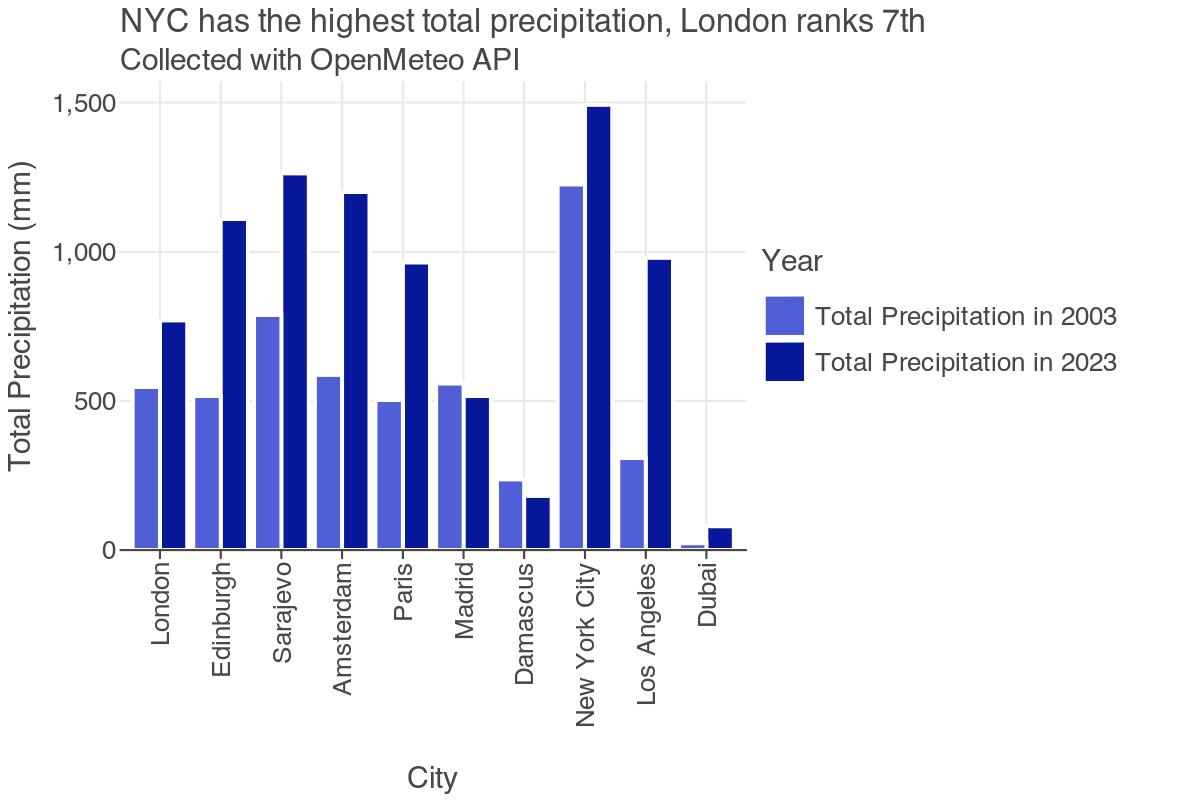

In [40]:
Image(filename='../figures/total_prec_plot.png')

2.5 Visualise the data on a world map 

**NOTE:** The majority of the code in this section is copied directly from the following online [notebook](https://nbviewer.org/github/JetBrains/lets-plot-docs/blob/master/source/examples/cookbook/geopandas_naturalearth.ipynb) on how to use lets-plot and geopandas to generate maps. Some portions of the code are AI generated. These are clearly indicated with comments.

In [14]:
# Taken from the notebook shared above

def get_naturalearth_data(data_type="admin_0_countries", columns=["NAME", "geometry"]):

    naturalearth_url = "https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/" + \
                       "data/naturalearth/{0}/data.shp?raw=true".format(data_type)
    sf = shapefile.Reader(naturalearth_url)

    gdf = gpd.GeoDataFrame(
        [
            dict(zip([field[0] for field in sf.fields[1:]], record))
            for record in sf.records()
        ],
        geometry=[shape(s) for s in sf.shapes()]
    )[columns]
    gdf.columns = [col.lower() for col in gdf.columns]

    return gdf

In [15]:
# Taken from the notebook shared above

world = get_naturalearth_data(columns=["NAME", "ISO_A3", "CONTINENT", "POP_EST", "GDP_MD", "geometry"])

Edinburgh is not in the _populated_places_ dataset found in the [JetBrains/lets-plot-docs](https://github.com/JetBrains/lets-plot-docs/tree/master/data/naturalearth/admin_0_countries) repository. New York City is referred to as 'New York' in the _populated_places_ dataset; the name must be identical to how the city name is written in the _world_cities.csv_ file. We must add both manually through the process below:

In [16]:
cities = get_naturalearth_data(data_type="populated_places")
selected_cities = cities[cities["name"].isin(["London", "Sarajevo", "Amsterdam", "Damascus", "Dubai", "Los Angeles", "Madrid", "Paris"])]

edinburgh = {
    'name': 'Edinburgh',
    'geometry': Point(-3.19648, 55.95206),  # longitude, latitude 
}
edinburgh_gdf = gpd.GeoDataFrame([edinburgh], geometry='geometry')

new_york_city = {
    'name': 'New York City',
    'geometry': Point(-73.99572, 40.72156), 
}

nyc_gdf = gpd.GeoDataFrame([new_york_city], geometry='geometry')

selected_cities = pd.concat([selected_cities, edinburgh_gdf, nyc_gdf])
selected_cities


,name,geometry
130,Sarajevo,POINT (18.383 43.85002)
149,Damascus,POINT (36.29805 33.50198)
183,Dubai,POINT (55.28695 25.21491)
185,Madrid,POINT (-3.6853 40.40197)
192,Amsterdam,POINT (4.91469 52.35191)
216,Los Angeles,POINT (-118.23199 34.04922)
219,London,POINT (-0.11867 51.50194)
235,Paris,POINT (2.35299 48.85809)
0,Edinburgh,POINT (-3.19648 55.95206)
0,New York City,POINT (-73.99572 40.72156)


In [17]:
selected_cities_prec = selected_cities.merge(df_total_prec_2023, how='left', left_on=['name'], right_on=['City']).drop(columns=['City'])
selected_cities_prec

,name,geometry,Total Precipitation in 2023 (mm)
0,Sarajevo,POINT (18.383 43.85002),1262.3
1,Damascus,POINT (36.29805 33.50198),182.0
2,Dubai,POINT (55.28695 25.21491),79.6
3,Madrid,POINT (-3.6853 40.40197),516.4
4,Amsterdam,POINT (4.91469 52.35191),1199.2
5,Los Angeles,POINT (-118.23199 34.04922),979.7
6,London,POINT (-0.11867 51.50194),769.5
7,Paris,POINT (2.35299 48.85809),963.8
8,Edinburgh,POINT (-3.19648 55.95206),1109.2
9,New York City,POINT (-73.99572 40.72156),1492.5


In [18]:
# Taken from the notebook shared above, zooming into the section of the map that is the focus

world_limits = coord_map(ylim=[-40, 80], xlim=[-150, 90])

In [44]:
# Partially taken from the notebook shared above

total_prec_map = (ggplot()
 + geom_map(map=world)
 + geom_point(map=selected_cities_prec, color='black', shape=21, stroke=1, mapping=aes(fill='Total Precipitation in 2023 (mm)', size='Total Precipitation in 2023 (mm)'), alpha=0.9)
 + ggsize(800, 600) + theme_void() + scale_fill_gradient(low='#6677ff', high='#001ae5') + world_limits
 + labs(title='NYC has the highest total precipitation, London ranks 7th')
) 

In [42]:
ggsave(total_prec_map, filename='total_prec_map.png', path='../figures')

'/Users/nadiabegic/Desktop/personal/projects/global-weather-analysis/figures/total_prec_map.png'

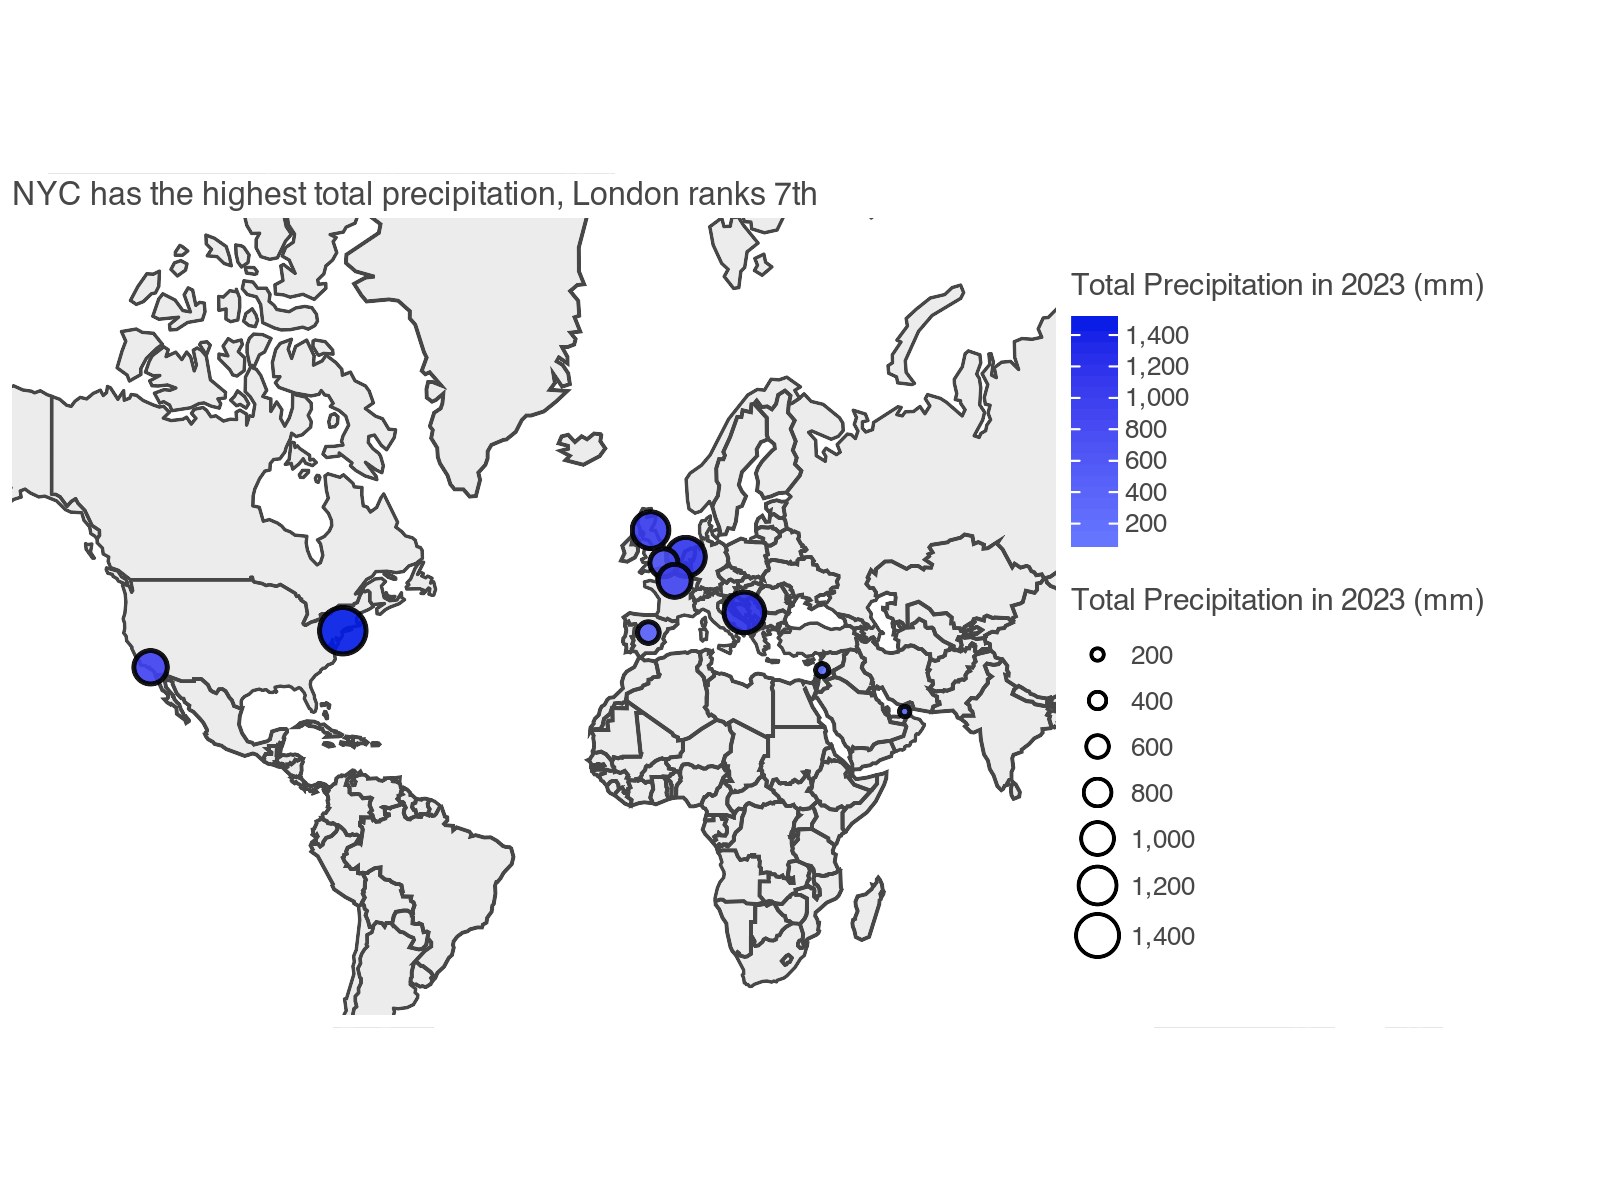

In [43]:
Image(filename='../figures/total_prec_map.png')

# 3. Visualise the daily precipitation in 2003 vs. 2023

3.1 Load the JSON file _daily_precipitation_2023.json_ as a pandas dataframe

In [20]:
with open('../data/daily_precipitation_2023.json', 'r') as file:
    daily_prec_2023_data = json.load(file)

df_daily_prec_2023 = pd.DataFrame(list(daily_prec_2023_data.items()), columns=['City', 'Daily Precipitation in 2023 (mm)'])
df_daily_prec_2023

,City,Daily Precipitation in 2023 (mm)
0,London,"[4.0, 0.2, 3.2, 0.9, 0.1, 1.2, 5.0, 1.8, 0.3, ..."
1,Edinburgh,"[6.0, 0.0, 3.7, 1.8, 5.9, 0.5, 7.6, 0.5, 0.1, ..."
2,Sarajevo,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 18.4,..."
3,Amsterdam,"[6.0, 3.5, 2.6, 11.0, 1.7, 2.2, 0.5, 0.8, 4.3,..."
4,Paris,"[2.2, 7.2, 2.3, 2.1, 0.4, 0.0, 1.4, 4.2, 0.8, ..."
5,Madrid,"[0.0, 1.1, 0.0, 0.0, 0.0, 0.0, 1.9, 12.4, 0.0,..."
6,Damascus,"[0.0, 0.0, 0.4, 0.5, 0.0, 0.5, 0.1, 0.0, 0.0, ..."
7,New York City,"[6.3, 0.2, 9.6, 1.3, 1.2, 9.6, 0.0, 0.0, 1.2, ..."
8,Los Angeles,"[21.8, 0.0, 6.4, 14.2, 35.3, 1.8, 0.0, 0.2, 14..."
9,Dubai,"[0.0, 0.0, 0.5, 0.0, 0.1, 0.1, 0.9, 0.0, 0.0, ..."


In [22]:
plot_daily_prec_2023_df = df_daily_prec_2023.explode('Daily Precipitation in 2023 (mm)') # explode the dataframe 

plot_daily_prec_2023_df['Daily Precipitation in 2023 (mm)']=plot_daily_prec_2023_df['Daily Precipitation in 2023 (mm)'].astype(float)

In [23]:
# view the summary statistics of the dataframe
plot_daily_prec_2023_df.groupby('City')['Daily Precipitation in 2023 (mm)'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Amsterdam,365.0,3.285479,5.174720,0.0,0.0,1.1,4.6,34.5
Damascus,365.0,0.498630,2.164467,0.0,0.0,0.0,0.0,18.4
Dubai,365.0,0.218082,1.867463,0.0,0.0,0.0,0.0,28.1
Edinburgh,365.0,3.038904,5.239948,0.0,0.0,0.8,3.8,55.1
London,365.0,2.108219,3.679015,0.0,0.0,0.4,2.6,27.4
Los Angeles,365.0,2.684110,10.130406,0.0,0.0,0.0,0.2,97.5
Madrid,365.0,1.414795,5.343981,0.0,0.0,0.0,0.3,62.7
New York City,365.0,4.089041,10.189312,0.0,0.0,0.1,2.9,84.9
Paris,365.0,2.640548,4.682672,0.0,0.0,0.4,3.2,25.5


3.2 Load the JSON file _daily_precipitation_2003.json_ as a pandas dataframe

In [24]:
with open('../data/daily_precipitation_2003.json', 'r') as file:
    daily_prec_2003_data = json.load(file)

df_daily_prec_2003 = pd.DataFrame(list(daily_prec_2003_data.items()), columns=['City', 'Daily Precipitation in 2003 (mm)'])
df_daily_prec_2003

,City,Daily Precipitation in 2003 (mm)
0,London,"[16.3, 10.6, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
1,Edinburgh,"[10.0, 5.8, 0.0, 0.0, 0.0, 0.0, 0.0, 2.3, 0.4,..."
2,Sarajevo,"[2.4, 0.0, 0.3, 0.1, 3.9, 0.0, 15.3, 0.0, 11.6..."
3,Amsterdam,"[13.6, 15.7, 3.7, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0..."
4,Paris,"[6.5, 9.3, 3.0, 4.9, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,Madrid,"[0.7, 0.9, 0.9, 0.5, 10.9, 0.7, 5.5, 1.6, 5.3,..."
6,Damascus,"[0.0, 0.1, 0.0, 5.8, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,New York City,"[15.3, 15.7, 3.4, 5.9, 0.0, 0.0, 0.0, 0.0, 0.0..."
8,Los Angeles,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, ..."
9,Dubai,"[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [25]:
plot_daily_prec_2003_df = df_daily_prec_2003.explode('Daily Precipitation in 2003 (mm)')

plot_daily_prec_2003_df['Daily Precipitation in 2003 (mm)']=plot_daily_prec_2003_df['Daily Precipitation in 2003 (mm)'].astype(float)

In [26]:
# view the summary statistics of the dataframe
plot_daily_prec_2003_df.groupby('City')['Daily Precipitation in 2003 (mm)'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Amsterdam,365.0,1.609589,3.275473,0.0,0.0,0.0,1.7,21.5
Damascus,365.0,0.648767,2.270518,0.0,0.0,0.0,0.0,18.4
Dubai,365.0,0.061918,0.542381,0.0,0.0,0.0,0.0,8.0
Edinburgh,365.0,1.412055,2.512139,0.0,0.0,0.1,1.8,16.1
London,365.0,1.497534,3.383268,0.0,0.0,0.0,1.0,27.0
Los Angeles,365.0,0.843288,4.514615,0.0,0.0,0.0,0.0,42.4
Madrid,365.0,1.528767,4.355320,0.0,0.0,0.0,0.4,34.8
New York City,365.0,3.357260,7.487402,0.0,0.0,0.0,2.6,51.5
Paris,365.0,1.375616,3.215575,0.0,0.0,0.0,1.3,28.9


3.3 Visualise the data with boxplots

3.3.1 Visualise a boxplot for each city's daily precipitation in 2023

In [27]:
daily_prec_2023_plot = (ggplot(plot_daily_prec_2023_df, aes(x='City', y='Daily Precipitation in 2023 (mm)', fill='City')) +
     geom_boxplot() +
     scale_fill_brewer(palette='Set3') +
     labs(x="City",
          y="Daily Precipitation in 2023 (mm)",
          title="London's daily precipitation is positively skewed",
          subtitle="Collected with OpenMeteo API") +
     ylim(0, 6)) # zooming in to better visualise the IQR, upper limit must be at least 4.6 as the max value for Q3 in the df is 4.6

daily_prec_2023_plot

3.3.2 Visualise a boxplot for each city's daily precipitation in 2003

In [28]:
daily_prec_2003_plot = (ggplot(plot_daily_prec_2003_df, aes(x='City', y='Daily Precipitation in 2003 (mm)', fill='City')) +
     geom_boxplot() +
     scale_fill_brewer(palette='Set3') +
     labs(x="City",
          y="Daily Precipitation in 2003 (mm)",
          title="London's daily precipitation is positively skewed",
          subtitle="Collected with OpenMeteo API") +
     ylim(0, 6)) # zooming into the boxplot to better visualise the IQR, upper limit must be at least 2.6 as the maximum value for Q3 in the dataframe is 2.6

daily_prec_2003_plot

# 4. Conclusion

So, is London really as rainy as the movies make it out to be? Yes and no. 

## 4.1 Number of Days of Rain in 2003 and 2023

The bar chart on rainy days suggests that London’s reputation is not entirely undeserved. While it is far from the rainiest city in the dataset, London consistently ranks third in both 2003 and 2023, behind Amsterdam and Edinburgh. On average, London experiences rain on roughly 40% of days each year, which likely reinforces the perception of being “rainy” despite modest total precipitation.

All cities saw fewer rainy days in 2003 compared to 2023. This upward shift aligns with broader climate trends showing increased rainfall and more frequent wet days across much of Europe. Interestingly, cities such as Paris record very similar numbers of rainy days to London, yet do not share the same cultural reputation — suggesting that narrative and media portrayal also play a role. As Lidell outlines in his article [Busting the myth of London being a rainy city](https://stephenliddell.co.uk/2018/01/27/busting-the-myth-of-london-being-a-rainy-city/), we could connect this claim to the unpredictability of London's weather, however that would require a different set of weather variables not analysed in this repository. 


## 4.2 Total Precipitation (mm) in 2003 and 2023

Total annual precipitation paints a different picture. London is not among the rainiest cities overall; it ranks 7th out of 10 in both years. Cities like Amsterdam and Edinburgh receive substantially more cumulative rainfall. The world map visualisation makes these differences clear: London sits closer to the median of the sample than the extremes. Total precipitation increased for all cities in 2023 compared to 2003. This uniform jump again points toward climate change and more intense rainfall patterns globally. However, London’s relative position within the group remains stable — it was not particularly rainy 20 years ago, and it still isn’t today.

## 4.3 Daily Precipitation (mm) in 2003 and 2023

The boxplots offer the most nuance. In 2003, London’s daily rainfall distribution shows a small interquartile range (IQR), implying low variability. By 2023, the IQR widens considerably, resembling that of traditionally wetter cities such as Edinburgh. This increase in variability contributes to the perception of “unpredictable” weather. London also exhibits a more extended upper tail in 2023, indicating occasional heavier rainfall spikes than cities with comparable totals (e.g., Paris). Paris, despite having similar or even lower totals, shows more consistent low-intensity rainfall, whereas London’s mix of light rain and scattered heavy bursts creates a greater sense of volatility.

## 4.4 Overall Assessment

So, is London really as rainy as people think?
Yes and no.
- No, if we measure rainfall by total volume: London receives far less precipitation than many European capitals.

- Yes, if we measure rainfall by frequency and variability: London rains often, and in 2023 shows wide day-to-day dispersion, contributing to its reputation for gloomy, unpredictable weather.

The myth of London as “extremely rainy” is therefore partly cultural, partly statistical. Its rainfall frequency and variability matter more to perception than total precipitation alone. Further analysis using additional variables — sunshine hours, humidity, wind patterns, temperature, etc. would help refine the picture. Nonetheless, based on the data presented here, London is not Europe’s wettest city, but its weather patterns certainly make it feel that way.